In [1]:
import numpy as np
import csv
import copy
import random
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
import sklearn
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.metrics import mean_squared_error as mse


In [3]:

# from google.colab import drive
# drive.mount('/content/drive')

# training_data = pd.read_csv('/content/drive/MyDrive/MSE-497-Code-Repository/Module-4/DFT_data.csv')
# outside_data = pd.read_csv('/content/drive/MyDrive/MSE-497-Code-Repository/Module-4/Outside.csv')
# elem_prop_all = pd.read_excel('/content/drive/MyDrive/MSE-497-Code-Repository/Module-4/Elemental_properties.xlsx')


!wget https://raw.githubusercontent.com/mannodiarun/IMRC-2025-ML-Tutorial/main/DFT_data.csv
!wget https://raw.githubusercontent.com/mannodiarun/IMRC-2025-ML-Tutorial/main/Outside.csv
!wget https://raw.githubusercontent.com/mannodiarun/IMRC-2025-ML-Tutorial/main/Elemental_properties.xlsx

training_data = pd.read_csv('DFT_data.csv')
outside_data = pd.read_csv('Outside.csv')
elem_prop_all = pd.read_excel('Elemental_properties.xlsx')



--2025-08-14 23:36:08--  https://raw.githubusercontent.com/mannodiarun/IMRC-2025-ML-Tutorial/main/DFT_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144184 (141K) [text/plain]
Saving to: ‘DFT_data.csv’

DFT_data.csv        100%[===================>] 140.80K  --.-KB/s    in 0.03s   

2025-08-14 23:36:08 (4.30 MB/s) - ‘DFT_data.csv’ saved [144184/144184]

--2025-08-14 23:36:08--  https://raw.githubusercontent.com/mannodiarun/IMRC-2025-ML-Tutorial/main/Outside.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9854300 (9.4

In [4]:
training_data

,Index,Formula,Decomposition Energy,Band Gap,K,Rb,Cs,MA,FA,Ca,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,0,MA1Ca0.12Sn0.75Pb0.12I3,-0.102625,1.0389,0.000,0.000,0.000,1.0,0.000,0.125,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
1,1,Rb0.38Cs0.12MA0.5Pb1I3,0.100325,1.9355,0.000,0.375,0.125,0.5,0.000,0.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
2,2,MA1Ca0.25Ba0.38Sn0.25Pb0.12Br3,0.001848,2.9821,0.000,0.000,0.000,1.0,0.000,0.250,...,265.95,3.120,79.9040,324.6,1139.9,5.286,14.725,2.96,35.0,4.0
3,3,K1Ca0.75Ba0.25Cl3,0.345121,4.4857,1.000,0.000,0.000,0.0,0.000,0.750,...,172.17,3.214,35.4527,348.8,1251.1,3.210,10.200,3.16,17.0,3.0
4,4,K0.38Rb0.12Cs0.12FA0.38Ca1I3,0.170902,3.4386,0.375,0.125,0.125,0.0,0.375,1.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,507,MAGeI3,-0.030202,1.3110,0.000,0.000,0.000,1.0,0.000,0.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
508,508,FASn0.25Pb0.75I3,-0.022527,1.5294,0.000,0.000,0.000,0.0,1.000,0.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
509,509,CsGe0.5Sn0.5Br3,-0.294721,0.7033,0.000,0.000,1.000,0.0,0.000,0.000,...,265.95,3.120,79.9040,324.6,1139.9,5.286,14.725,2.96,35.0,4.0
510,510,FAPbBr3,-0.156236,2.1126,0.000,0.000,0.000,0.0,1.000,0.000,...,265.95,3.120,79.9040,324.6,1139.9,5.286,14.725,2.96,35.0,4.0


In [5]:
training_data["Band Gap"]

,Band Gap
0,1.0389
1,1.9355
2,2.9821
3,4.4857
4,3.4386
...,...
507,1.3110
508,1.5294
509,0.7033
510,2.1126


In [6]:
training_data[training_data['K'] == 0.0][training_data['Rb'] == 0.0][training_data['Cs'] == 0.0]

/tmp/ipython-input-1592943376.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  training_data[training_data['K'] == 0.0][training_data['Rb'] == 0.0][training_data['Cs'] == 0.0]
/tmp/ipython-input-1592943376.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  training_data[training_data['K'] == 0.0][training_data['Rb'] == 0.0][training_data['Cs'] == 0.0]


,Index,Formula,Decomposition Energy,Band Gap,K,Rb,Cs,MA,FA,Ca,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,0,MA1Ca0.12Sn0.75Pb0.12I3,-0.102625,1.0389,0.0,0.0,0.0,1.0,0.0,0.125,...,386.70000,4.93000,126.904500,295.3000,1008.4000,7.76000,20.900000,2.6600,53.00,5.000
2,2,MA1Ca0.25Ba0.38Sn0.25Pb0.12Br3,0.001848,2.9821,0.0,0.0,0.0,1.0,0.0,0.250,...,265.95000,3.12000,79.904000,324.6000,1139.9000,5.28600,14.725000,2.9600,35.00,4.000
9,9,MA1Ba0.25Ge0.12Sn0.62I3,-0.025794,1.4763,0.0,0.0,0.0,1.0,0.0,0.000,...,386.70000,4.93000,126.904500,295.3000,1008.4000,7.76000,20.900000,2.6600,53.00,5.000
13,13,FA1Pb1Cl2.62Br0.38,-0.192859,2.6371,0.0,0.0,0.0,0.0,1.0,0.000,...,183.89250,3.20225,41.009113,345.7750,1237.2000,3.46950,10.765625,3.1350,19.25,3.125
15,15,MA1Ba1Br2.62I0.38,0.097637,3.9356,0.0,0.0,0.0,1.0,0.0,0.000,...,281.04375,3.34625,85.779062,320.9375,1123.4625,5.59525,15.496875,2.9225,37.25,4.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,505,MASnCl3,-0.246338,1.5821,0.0,0.0,0.0,1.0,0.0,0.000,...,172.17000,3.21400,35.452700,348.8000,1251.1000,3.21000,10.200000,3.1600,17.00,3.000
507,507,MAGeI3,-0.030202,1.3110,0.0,0.0,0.0,1.0,0.0,0.000,...,386.70000,4.93000,126.904500,295.3000,1008.4000,7.76000,20.900000,2.6600,53.00,5.000
508,508,FASn0.25Pb0.75I3,-0.022527,1.5294,0.0,0.0,0.0,0.0,1.0,0.000,...,386.70000,4.93000,126.904500,295.3000,1008.4000,7.76000,20.900000,2.6600,53.00,5.000
510,510,FAPbBr3,-0.156236,2.1126,0.0,0.0,0.0,0.0,1.0,0.000,...,265.95000,3.12000,79.904000,324.6000,1139.9000,5.28600,14.725000,2.9600,35.00,4.000


In [7]:
training_data[training_data['MA'] == 0.0][training_data['FA'] == 0.0]

/tmp/ipython-input-3286995127.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  training_data[training_data['MA'] == 0.0][training_data['FA'] == 0.0]


,Index,Formula,Decomposition Energy,Band Gap,K,Rb,Cs,MA,FA,Ca,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
3,3,K1Ca0.75Ba0.25Cl3,0.345121,4.4857,1.00,0.000,0.000,0.0,0.0,0.75,...,172.170,3.214,35.45270,348.80,1251.10,3.210,10.2000,3.16,17.0,3.0
5,5,Cs1Sr0.25Ba0.12Ge0.12Sn0.38Pb0.12I3,0.052915,1.6723,0.00,0.000,1.000,0.0,0.0,0.00,...,386.700,4.930,126.90450,295.30,1008.40,7.760,20.9000,2.66,53.0,5.0
6,6,K1Sr1I3,0.472662,3.1709,1.00,0.000,0.000,0.0,0.0,0.00,...,386.700,4.930,126.90450,295.30,1008.40,7.760,20.9000,2.66,53.0,5.0
7,7,K1Ba1Cl3,0.910534,4.1664,1.00,0.000,0.000,0.0,0.0,0.00,...,172.170,3.214,35.45270,348.80,1251.10,3.210,10.2000,3.16,17.0,3.0
8,8,K0.25Rb0.38Cs0.38Pb1I3,0.243601,1.4629,0.25,0.375,0.375,0.0,0.0,0.00,...,386.700,4.930,126.90450,295.30,1008.40,7.760,20.9000,2.66,53.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,CsSnCl3,-0.323973,1.0285,0.00,0.000,1.000,0.0,0.0,0.00,...,172.170,3.214,35.45270,348.80,1251.10,3.210,10.2000,3.16,17.0,3.0
500,500,CsPbBr1.5I1.5,-0.023145,1.6016,0.00,0.000,1.000,0.0,0.0,0.00,...,326.325,4.025,103.40425,309.95,1074.15,6.523,17.8125,2.81,44.0,4.5
503,503,CsSnI3,-0.151908,0.4835,0.00,0.000,1.000,0.0,0.0,0.00,...,386.700,4.930,126.90450,295.30,1008.40,7.760,20.9000,2.66,53.0,5.0
506,506,CsGeI3,-0.006498,0.6381,0.00,0.000,1.000,0.0,0.0,0.00,...,386.700,4.930,126.90450,295.30,1008.40,7.760,20.9000,2.66,53.0,5.0


In [8]:
df = pd.DataFrame(training_data)
df.query('MA > 0.0 or FA > 0.0')

,Index,Formula,Decomposition Energy,Band Gap,K,Rb,Cs,MA,FA,Ca,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,0,MA1Ca0.12Sn0.75Pb0.12I3,-0.102625,1.0389,0.000,0.000,0.000,1.0,0.000,0.125,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
1,1,Rb0.38Cs0.12MA0.5Pb1I3,0.100325,1.9355,0.000,0.375,0.125,0.5,0.000,0.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
2,2,MA1Ca0.25Ba0.38Sn0.25Pb0.12Br3,0.001848,2.9821,0.000,0.000,0.000,1.0,0.000,0.250,...,265.95,3.120,79.9040,324.6,1139.9,5.286,14.725,2.96,35.0,4.0
4,4,K0.38Rb0.12Cs0.12FA0.38Ca1I3,0.170902,3.4386,0.375,0.125,0.125,0.0,0.375,1.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
9,9,MA1Ba0.25Ge0.12Sn0.62I3,-0.025794,1.4763,0.000,0.000,0.000,1.0,0.000,0.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,505,MASnCl3,-0.246338,1.5821,0.000,0.000,0.000,1.0,0.000,0.000,...,172.17,3.214,35.4527,348.8,1251.1,3.210,10.200,3.16,17.0,3.0
507,507,MAGeI3,-0.030202,1.3110,0.000,0.000,0.000,1.0,0.000,0.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
508,508,FASn0.25Pb0.75I3,-0.022527,1.5294,0.000,0.000,0.000,0.0,1.000,0.000,...,386.70,4.930,126.9045,295.3,1008.4,7.760,20.900,2.66,53.0,5.0
510,510,FAPbBr3,-0.156236,2.1126,0.000,0.000,0.000,0.0,1.000,0.000,...,265.95,3.120,79.9040,324.6,1139.9,5.286,14.725,2.96,35.0,4.0


In [9]:
outside_data

,Index,Formula,K,Rb,Cs,MA,FA,Ca,Sr,Ba,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,0,RbSrI3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,386.70,4.93,126.90,295.30,1008.40,7.76,20.90,2.66,53.00,5.00
1,1,RbSrCl0.125I2.875,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,377.76,4.86,123.09,297.53,1018.51,7.57,20.45,2.68,51.50,4.92
2,2,RbSrCl0.250I2.750,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,368.82,4.79,119.28,299.76,1028.63,7.38,20.01,2.70,50.00,4.83
3,3,RbSrCl0.375I2.625,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,359.88,4.72,115.47,301.99,1038.74,7.19,19.56,2.72,48.50,4.75
4,4,RbSrCl0.500I2.500,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,350.94,4.64,111.66,304.22,1048.85,7.00,19.12,2.74,47.00,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37780,37780,CsBaBr2.750Cl0.125I0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,267.07,3.20,80.01,324.39,1139.05,5.30,14.79,2.96,35.00,4.00
37781,37781,CsBaBr2.750Cl0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,258.13,3.13,76.20,326.62,1149.17,5.11,14.35,2.98,33.50,3.92
37782,37782,CsBaBr2.875I0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,270.98,3.20,81.86,323.38,1134.42,5.39,14.98,2.95,35.75,4.04
37783,37783,CsBaBr2.875Cl0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,262.04,3.12,78.05,325.61,1144.53,5.20,14.54,2.97,34.25,3.96


In [10]:
df = pd.DataFrame(training_data)
Index = training_data["Index"]
Formula = training_data["Formula"]
Decomp = training_data["Decomposition Energy"]
Gap = training_data["Band Gap"]
Comp_desc = pd.DataFrame(df, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I'])
Elem_desc = pd.DataFrame(df, columns=['A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
All_desc = pd.DataFrame(df, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])

df_out = pd.DataFrame(outside_data)
Comp_desc_out = pd.DataFrame(df_out, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I'])
Elem_desc_out = pd.DataFrame(df_out, columns=['A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
All_desc_out = pd.DataFrame(df_out, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])


In [11]:
Formula

,Formula
0,MA1Ca0.12Sn0.75Pb0.12I3
1,Rb0.38Cs0.12MA0.5Pb1I3
2,MA1Ca0.25Ba0.38Sn0.25Pb0.12Br3
3,K1Ca0.75Ba0.25Cl3
4,K0.38Rb0.12Cs0.12FA0.38Ca1I3
...,...
507,MAGeI3
508,FASn0.25Pb0.75I3
509,CsGe0.5Sn0.5Br3
510,FAPbBr3


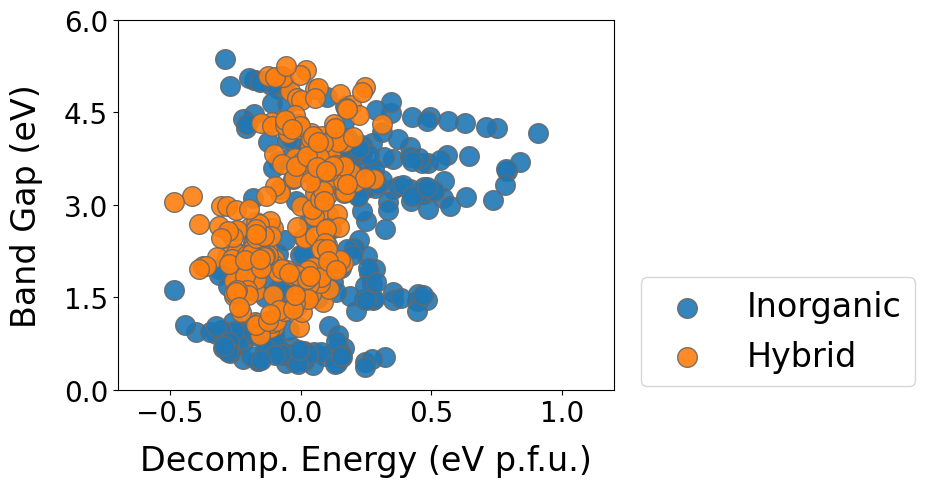

In [12]:
###   Visualize DFT Data, Decomp vs Gap    ###

import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.font_manager

#plt.scatter(Decomp, Gap, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

#plt.scatter(training_data["Decomposition Energy"], training_data["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

#plt.scatter(training_data[training_data['MA'] == 0.0][training_data['FA'] == 0.0]["Decomposition Energy"], training_data[training_data['MA'] == 0.0][training_data['FA'] == 0.0]["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Inorganic')

df = pd.DataFrame(training_data)
plt.scatter(df.query('MA == 0.0 & FA == 0.0')["Decomposition Energy"], df.query('MA == 0.0 & FA == 0.0')["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Inorganic')
plt.scatter(df.query('MA > 0.0 or FA > 0.0')["Decomposition Energy"], df.query('MA > 0.0 or FA > 0.0')["Band Gap"], marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Hybrid')

plt.xlim([-0.7, 1.2])
plt.ylim([0.0, 6.0])
plt.xticks([-0.5, 0.0, 0.5, 1.0], fontsize=20)
plt.yticks([0.0, 1.5, 3.0, 4.5, 6.0], fontsize=20)
plt.xlabel('Decomp. Energy (eV p.f.u.)', fontsize=24, labelpad=12)
plt.ylabel('Band Gap (eV)', fontsize=24, labelpad=15)
plt.legend(bbox_to_anchor=(1.02,0.35), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':24})
plt.savefig('plot_decomp_gap.pdf', dpi=450)



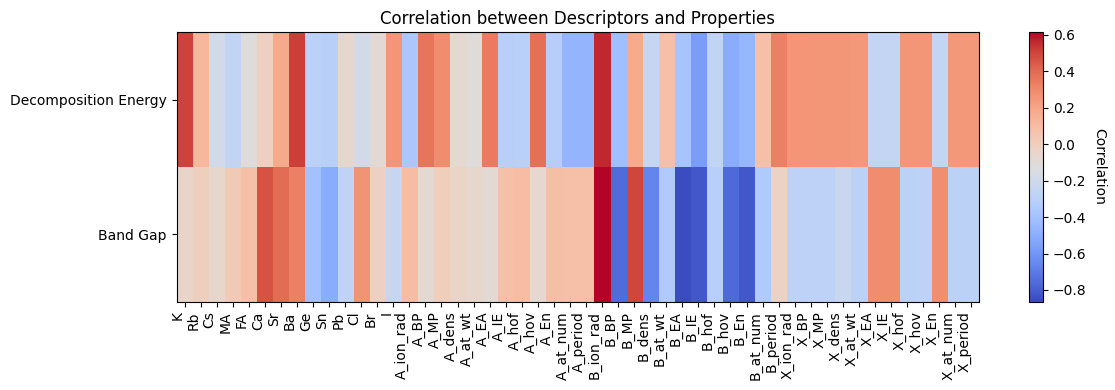

In [15]:
## Pearson Correlation Coefficient for Decomp and Gap with (a) 14 Comp_desc dimensions, (b) 36 Elem_desc dimensions, and (c) 50 All_desc dimensions ##


#X = Comp_desc
#X = Elem_desc
X = All_desc

correlation_matrix = np.zeros((2, len(X.columns)))  # Initialize correlation matrix

for i, property_name in enumerate(["Decomposition Energy", "Band Gap"]):
    for j, descriptor_name in enumerate(X.columns):
        correlation, _ = stats.pearsonr(training_data[property_name], X[descriptor_name])
        correlation_matrix[i, j] = correlation

fig, ax = plt.subplots(figsize=(12, 4))  # Adjust figure size as needed

im = ax.imshow(correlation_matrix, cmap="coolwarm", aspect='auto')  # Create heatmap

# Set axis labels and ticks
ax.set_xticks(np.arange(len(X.columns)))
ax.set_xticklabels(X.columns, rotation=90, ha="right")  # Rotate x-axis labels for better readability
ax.set_yticks(np.arange(2))
ax.set_yticklabels(["Decomposition Energy", "Band Gap"])

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

plt.title("Correlation between Descriptors and Properties")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


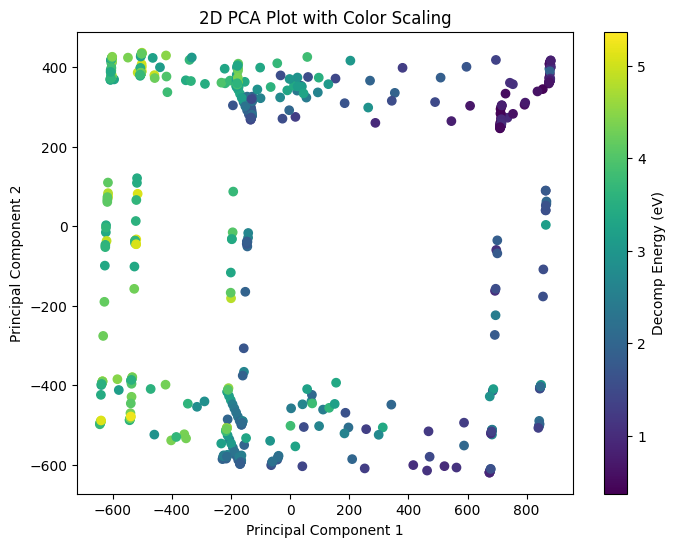

In [16]:
## Run Principal Component Analysis on the Input Descriptor space. Plot PC1 vs PC2. ##


#X = Comp_desc
#X = Elem_desc
X = All_desc

#pca = PCA(n_components=m)  # Choose the number of components you want to keep
#principalComponents = pca.fit_transform(X)
#pca.explained_variance_ratio_

pca = PCA(n_components=2)  # Choose the number of components you want to keep
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=training_data["Band Gap"], cmap='viridis')  # Use a colormap like 'viridis'
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Plot with Color Scaling')
plt.colorbar(label='Decomp Energy (eV)')  # Add a colorbar to show the color scale
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


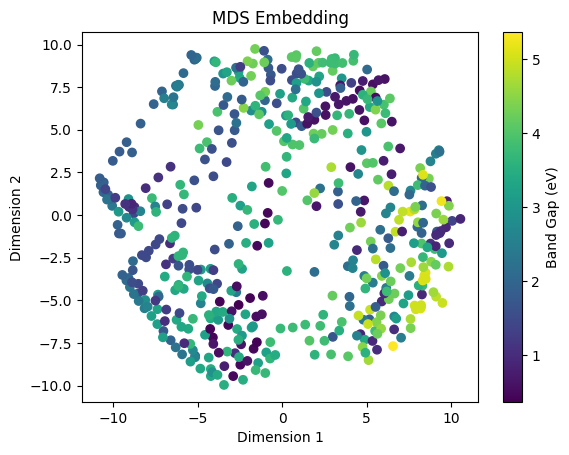

In [17]:
## 2D projection of input data: MDS ##

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

X = Comp_desc
#X = Elem_desc
#X = All_desc
dissimilarity_matrix = euclidean_distances(X)

mds = MDS(n_components=2, random_state=0)  # Specify the desired number of dimensions (e.g., 2)
embedded_data = mds.fit_transform(dissimilarity_matrix)

plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=training_data['Band Gap'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Embedding')
plt.colorbar(label='Band Gap (eV)')  # Add a colorbar to show the color scale
plt.show()


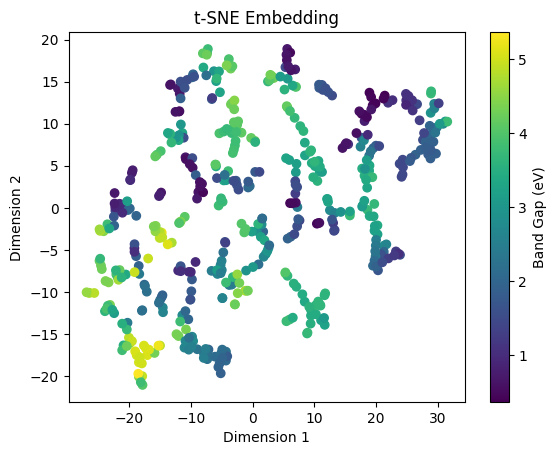

In [18]:
## 2D projection of input data: t-SNE ##

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)  # Specify the desired number of dimensions (e.g., 2)

X = Comp_desc
#X = Elem_desc
#X = All_desc
embedded_data = tsne.fit_transform(np.array(X))

plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=training_data['Band Gap'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Embedding')
plt.colorbar(label='Band Gap (eV)')  # Add a colorbar to show the color scale
plt.show()


In [ ]:
## Regression models for property prediction (input = descriptors, output = property) ##


In [19]:
X_train, X_test, Decomp_train, Decomp_test, Formulas_train, Formulas_test = train_test_split(Comp_desc, Decomp, Formula, test_size=0.5)


In [20]:
X_train

,K,Rb,Cs,MA,FA,Ca,Sr,Ba,Ge,Sn,Pb,Cl,Br,I
214,0.0,1.0,0.0,0.0,0.0,0.000,0.0,1.000,0.000,0.000,0.000,0.125,0.000,0.875
153,0.0,0.0,1.0,0.0,0.0,0.000,0.0,1.000,0.000,0.000,0.000,0.000,1.000,0.000
434,0.0,1.0,0.0,0.0,0.0,0.125,0.0,0.625,0.125,0.125,0.000,1.000,0.000,0.000
256,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.000,0.000,1.000,0.000,0.000,0.125,0.875
451,0.0,0.0,0.0,0.0,1.0,0.000,0.0,1.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,1.0,0.0,0.0,0.0,1.000,0.0,0.000,0.000,0.000,0.000,0.625,0.000,0.375
457,0.0,0.0,0.0,1.0,0.0,1.000,0.0,0.000,0.000,0.000,0.000,1.000,0.000,0.000
474,0.0,0.0,0.0,0.0,1.0,0.000,0.0,0.000,1.000,0.000,0.000,1.000,0.000,0.000
465,0.0,0.0,0.0,0.0,1.0,0.000,0.0,0.000,0.000,0.000,1.000,0.000,0.125,0.875


In [21]:
Formulas_test

,Formula
61,K1Sr0.62Ba0.25Pb0.12I3
342,Rb1Ca1Br3
97,Rb1Sr0.25Ba0.25Ge0.25Pb0.25Br3
410,K1Pb1Br3
46,MA1Ba0.5Ge0.5Br3
...,...
469,FAPbI3
120,K1Ba0.25Ge0.62Sn0.12Cl3
293,K1Pb1I3
66,K0.38Rb0.12Cs0.12MA0.38Ca1Cl3


Train RMSE: 0.10760388398056948
Test RMSE: 0.09764621957105765

Train MAE: 0.07680561713193043
Test MAE: 0.07463734014138453

Train R2: 0.7911872941396121
Test R2: 0.7983884699571789



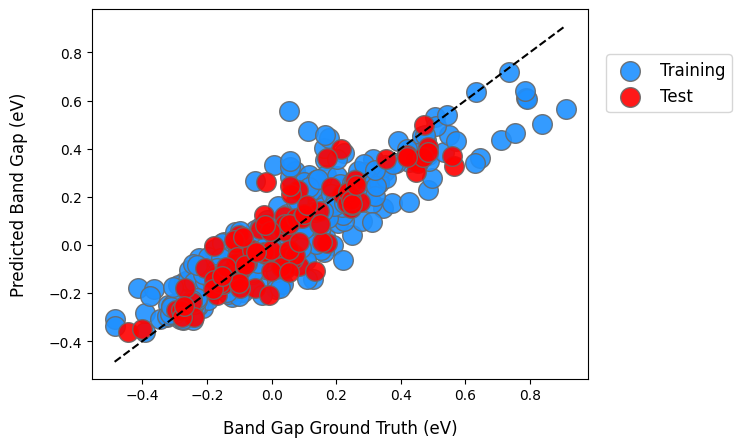

In [22]:
## Linear regression model for Decomposition Energy ##


from sklearn.linear_model import LinearRegression

#X = Comp_desc
#X = Elem_desc
X = All_desc
X_train, X_test, Decomp_train, Decomp_test, Formulas_train, Formulas_test = train_test_split(X, Decomp, Formula, test_size=0.2)

lr = LinearRegression()

lr.fit(X_train, Decomp_train)
Pred_train = lr.predict(X_train)
Pred_test = lr.predict(X_test)
rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_train, Pred_train) )
mae_test = sklearn.metrics.mean_absolute_error(Decomp_test, Pred_test)
mae_train = sklearn.metrics.mean_absolute_error(Decomp_train, Pred_train)
r2_score_test= sklearn.metrics.r2_score(Decomp_test, Pred_test)
r2_score_train= sklearn.metrics.r2_score(Decomp_train, Pred_train)

print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test) + '\n')
print("Train MAE: " + str(mae_train))
print("Test MAE: " + str(mae_test) + '\n')
print("Train R2: " + str(r2_score_train))
print("Test R2: " + str(r2_score_test) + '\n')

plt.scatter(Decomp_train, Pred_train, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Training')
plt.scatter(Decomp_test, Pred_test, c='red', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Test')
plt.xlabel('Band Gap Ground Truth (eV)', fontsize=12, labelpad=12)
plt.ylabel('Predicted Band Gap (eV)', fontsize=12, labelpad=15)
plt.legend(bbox_to_anchor=(1.02,0.9), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':12})

x_line = np.linspace(min(Decomp_train.min(), Decomp_test.min()), max(Decomp_train.max(), Decomp_test.max()), 100)  # Adjust the range as needed
y_line = x_line  # Since y = x
plt.plot(x_line, y_line, color='black', ls='--', label='y=x')



Train RMSE: 0.36176326245436896
Test RMSE: 0.38246750228334014

Train MAE: 0.2724345930251049
Test MAE: 0.28775734874206843

Train R2: 0.9223770980473255
Test R2: 0.9071667890958808



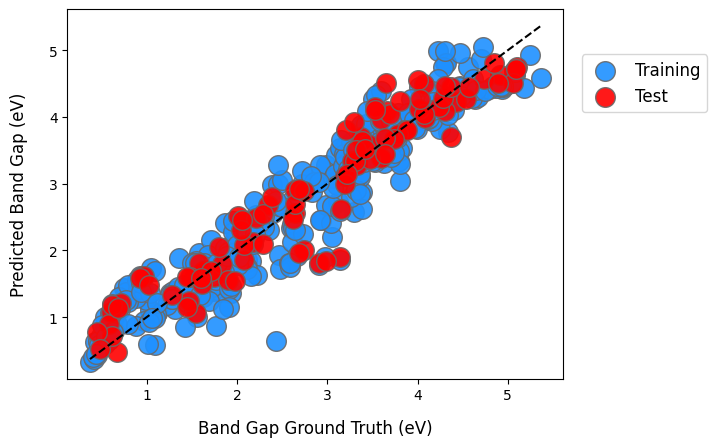

In [23]:
## Linear regression model for Band Gap ##


from sklearn.linear_model import LinearRegression

#X = Comp_desc
#X = Elem_desc
X = All_desc
X_train, X_test, Gap_train, Gap_test, Formulas_train, Formulas_test = train_test_split(X, Gap, Formula, test_size=0.2)

lr = LinearRegression()

lr.fit(X_train, Gap_train)
Pred_train = lr.predict(X_train)
Pred_test = lr.predict(X_test)
rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Gap_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Gap_train, Pred_train) )
mae_test = sklearn.metrics.mean_absolute_error(Gap_test, Pred_test)
mae_train = sklearn.metrics.mean_absolute_error(Gap_train, Pred_train)
r2_score_test= sklearn.metrics.r2_score(Gap_test, Pred_test)
r2_score_train= sklearn.metrics.r2_score(Gap_train, Pred_train)

print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test) + '\n')
print("Train MAE: " + str(mae_train))
print("Test MAE: " + str(mae_test) + '\n')
print("Train R2: " + str(r2_score_train))
print("Test R2: " + str(r2_score_test) + '\n')

plt.scatter(Gap_train, Pred_train, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Training')
plt.scatter(Gap_test, Pred_test, c='red', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Test')
plt.xlabel('Band Gap Ground Truth (eV)', fontsize=12, labelpad=12)
plt.ylabel('Predicted Band Gap (eV)', fontsize=12, labelpad=15)
plt.legend(bbox_to_anchor=(1.02,0.9), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':12})

x_line = np.linspace(min(Gap_train.min(), Gap_test.min()), max(Gap_train.max(), Gap_test.max()), 100)  # Adjust the range as needed
y_line = x_line  # Since y = x
plt.plot(x_line, y_line, color='black', ls='--', label='y=x')



Train RMSE: 0.020444062511201823
Test RMSE: 0.05290949071466317

Train MAE: 0.014088694319388749
Test MAE: 0.04022371427650486

Train R2: 0.992454492426716
Test R2: 0.9393563682356593



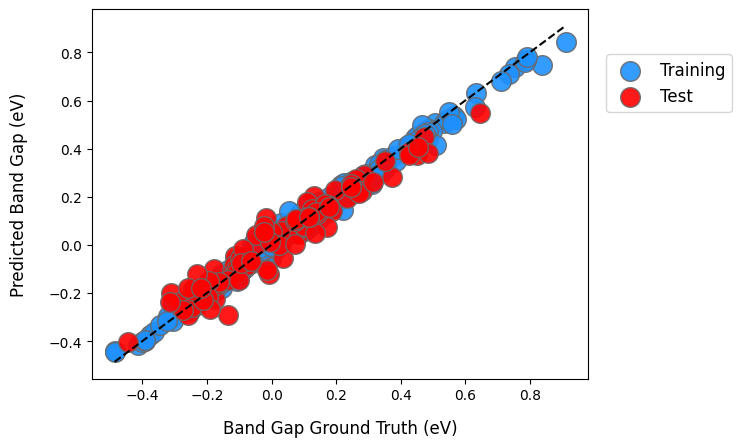

In [24]:
## Random Forest regression model for Decomposition Energy ##


from sklearn.ensemble import RandomForestRegressor

#X = Comp_desc
#X = Elem_desc
X = All_desc
X_train, X_test, Decomp_train, Decomp_test, Formulas_train, Formulas_test = train_test_split(X, Decomp, Formula, test_size=0.2)

rfr = RandomForestRegressor()

rfr.fit(X_train, Decomp_train)
Pred_train = rfr.predict(X_train)
Pred_test = rfr.predict(X_test)

rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_train, Pred_train) )
mae_test = sklearn.metrics.mean_absolute_error(Decomp_test, Pred_test)
mae_train = sklearn.metrics.mean_absolute_error(Decomp_train, Pred_train)
r2_score_test= sklearn.metrics.r2_score(Decomp_test, Pred_test)
r2_score_train= sklearn.metrics.r2_score(Decomp_train, Pred_train)

print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test) + '\n')
print("Train MAE: " + str(mae_train))
print("Test MAE: " + str(mae_test) + '\n')
print("Train R2: " + str(r2_score_train))
print("Test R2: " + str(r2_score_test) + '\n')

plt.scatter(Decomp_train, Pred_train, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Training')
plt.scatter(Decomp_test, Pred_test, c='red', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Test')
plt.xlabel('Band Gap Ground Truth (eV)', fontsize=12, labelpad=12)
plt.ylabel('Predicted Band Gap (eV)', fontsize=12, labelpad=15)
plt.legend(bbox_to_anchor=(1.02,0.9), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':12})

x_line = np.linspace(min(Decomp_train.min(), Decomp_test.min()), max(Decomp_train.max(), Decomp_test.max()), 100)  # Adjust the range as needed
y_line = x_line  # Since y = x
plt.plot(x_line, y_line, color='black', ls='--', label='y=x')



Train RMSE: 0.09709940411496695
Test RMSE: 0.24574325086316448

Train MAE: 0.060762249388753124
Test MAE: 0.15629223300970874

Train R2: 0.9943167387293265
Test R2: 0.9642269217855453



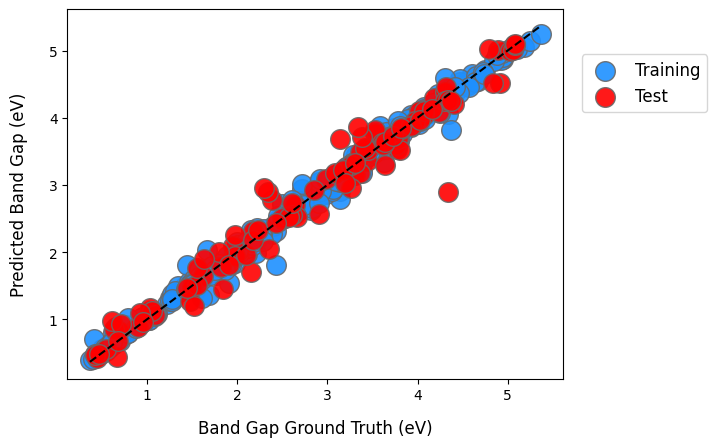

In [26]:
## Random Forest regression model for Band Gap ##


from sklearn.ensemble import RandomForestRegressor

#X = Comp_desc
#X = Elem_desc
X = All_desc
X_train, X_test, Gap_train, Gap_test, Formulas_train, Formulas_test = train_test_split(X, Gap, Formula, test_size=0.2)

rfr = RandomForestRegressor()

rfr.fit(X_train, Gap_train)
Pred_train = rfr.predict(X_train)
Pred_test = rfr.predict(X_test)


rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Gap_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Gap_train, Pred_train) )
mae_test = sklearn.metrics.mean_absolute_error(Gap_test, Pred_test)
mae_train = sklearn.metrics.mean_absolute_error(Gap_train, Pred_train)
r2_score_test= sklearn.metrics.r2_score(Gap_test, Pred_test)
r2_score_train= sklearn.metrics.r2_score(Gap_train, Pred_train)

print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test) + '\n')
print("Train MAE: " + str(mae_train))
print("Test MAE: " + str(mae_test) + '\n')
print("Train R2: " + str(r2_score_train))
print("Test R2: " + str(r2_score_test) + '\n')

plt.scatter(Gap_train, Pred_train, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Training')
plt.scatter(Gap_test, Pred_test, c='red', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Test')
plt.xlabel('Band Gap Ground Truth (eV)', fontsize=12, labelpad=12)
plt.ylabel('Predicted Band Gap (eV)', fontsize=12, labelpad=15)
plt.legend(bbox_to_anchor=(1.02,0.9), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':12})

x_line = np.linspace(min(Gap_train.min(), Gap_test.min()), max(Gap_train.max(), Gap_test.max()), 100)  # Adjust the range as needed
y_line = x_line  # Since y = x
plt.plot(x_line, y_line, color='black', ls='--', label='y=x')



In [ ]:
## Random Forest Regression: Optimize Hyperparameters ##

X_train, X_test, Decomp_train, Decomp_test, Formulas_train, Formulas_test = train_test_split(Comp_desc, Decomp, Formula, test_size=0.8)

param_grid = {"n_estimators": [50, 100, 200],
             "max_features": [10, 20, 40],
             "min_samples_leaf": [5,10,20],
             "max_depth": [5,10,15],
             "min_samples_split": [2, 5, 10]}

rfr = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)

rfr.fit(X_train, Decomp_train)
Pred_train = rfr.predict(X_train)
Pred_test = rfr.predict(X_test)
rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_train, Pred_train) )

print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test))


Train RMSE: 0.04303385466675852
Test RMSE: 0.10573568048040247


In [29]:
##  Outside predictions using regression model  ##


#X = Comp_desc
#X = Elem_desc
X = All_desc
X_train, X_test, Decomp_train, Decomp_test, Gap_train, Gap_test, Formulas_train, Formulas_test = train_test_split(X, Decomp, Gap, Formula, test_size=0.2)

rfr_decomp = RandomForestRegressor()
rfr_decomp.fit(X_train, Decomp_train)
Pred_train_decomp = rfr_decomp.predict(X_train)
Pred_test_decomp = rfr_decomp.predict(X_test)
rmse_test_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_test, Pred_test_decomp) )
rmse_train_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_train, Pred_train_decomp) )
print(rmse_test_decomp, rmse_train_decomp)

rfr_gap = RandomForestRegressor()
rfr_gap.fit(X_train, Gap_train)
Pred_train_gap = rfr_gap.predict(X_train)
Pred_test_gap = rfr_gap.predict(X_test)
rmse_test_gap = np.sqrt( sklearn.metrics.mean_squared_error(Gap_test, Pred_test_gap) )
rmse_train_gap = np.sqrt( sklearn.metrics.mean_squared_error(Gap_train, Pred_train_gap) )
print(rmse_test_gap, rmse_train_gap)

#X_out = Comp_desc_out
#X_out = Elem_desc_out
X_out = All_desc_out
Pred_out_decomp = rfr_decomp.predict(X_out)
Pred_out_gap = rfr_gap.predict(X_out)



0.0680969829422289 0.020372807995503825
0.22458817583824275 0.09268955888711004


(array([ 5.,  5., 26., 32., 35., 45., 43., 58., 48., 26., 28., 18.,  8.,
        12.,  7.,  4.,  1.,  3.,  4.,  1.]),
 array([-0.43336685, -0.36832672, -0.3032866 , -0.23824647, -0.17320635,
        -0.10816622, -0.0431261 ,  0.02191403,  0.08695415,  0.15199428,
         0.2170344 ,  0.28207452,  0.34711465,  0.41215477,  0.4771949 ,
         0.54223502,  0.60727515,  0.67231527,  0.7373554 ,  0.80239552,
         0.86743564]),
 <BarContainer object of 20 artists>)

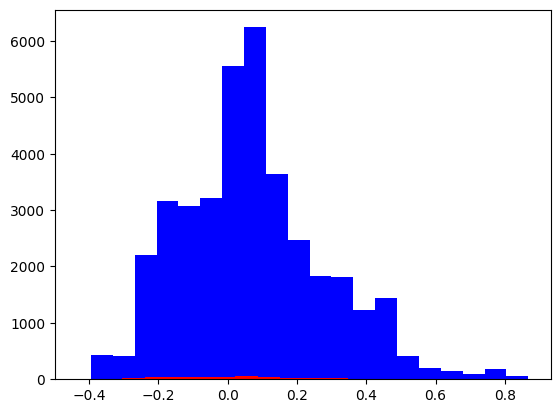

In [30]:
plt.hist(Pred_out_decomp, bins=20, color='b')
plt.hist(Pred_train_decomp, bins=20, color='r')

/tmp/ipython-input-2794842413.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.02,0.35), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':24})


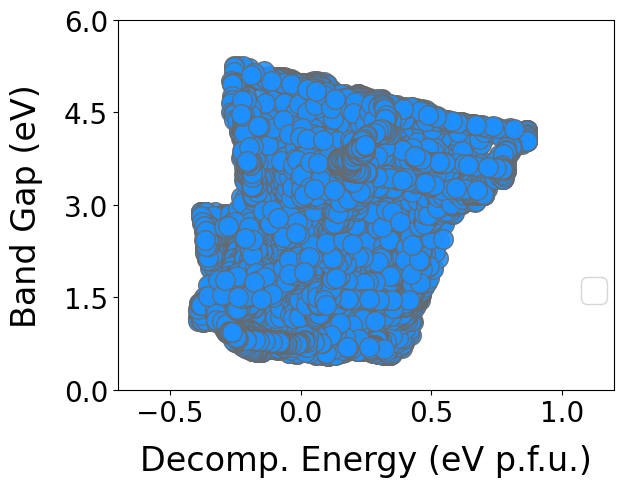

In [31]:
###   Visualize Outside Predictions, Decomp vs Gap    ###

import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.font_manager

plt.scatter(Pred_out_decomp, Pred_out_gap, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='_nolabel_')

plt.xlim([-0.7, 1.2])
plt.ylim([0.0, 6.0])
plt.xticks([-0.5, 0.0, 0.5, 1.0], fontsize=20)
plt.yticks([0.0, 1.5, 3.0, 4.5, 6.0], fontsize=20)
plt.xlabel('Decomp. Energy (eV p.f.u.)', fontsize=24, labelpad=12)
plt.ylabel('Band Gap (eV)', fontsize=24, labelpad=15)
plt.legend(bbox_to_anchor=(1.02,0.35), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':24})
plt.savefig('plot_decomp_gap_outside.pdf', dpi=450)



Accuracy: 0.91015625


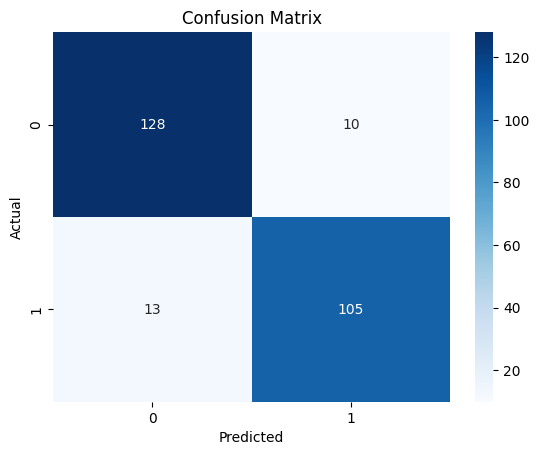

In [32]:
## Classification model: decomp < 0 vs decomp > 0 ##

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Create target variable for stability (0 = unstable, 1 = stable)
training_data['stable'] = (training_data['Decomposition Energy'] < 0).astype(int)

# Choose descriptor set (e.g., All_desc)
X = All_desc
y = training_data['stable']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix

# Create confusion matrix to visualize accuracy
#Diagonals represent correct, off diagonal is incorrect predictions.
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
import seaborn
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Train RMSE: 0.09176232789141994
Test RMSE: 0.09981932599524627



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/tmp/ipython-input-3928849755.py:50: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(Decomp_train, Pred_train, yerr = [sigma_train[:], sigma_train[:]], c='blue', marker='s', alpha=1.0, markeredgecolor='dimgrey', markersize=7, fmt='o', ecolor='blue', capthick=2, label='Training')
/tmp/ipython-input-3928849755.py:51: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(Decomp_test, Pred_test, yerr = [sigma_test[:], sigma_test[:]], c='orange', marker='s

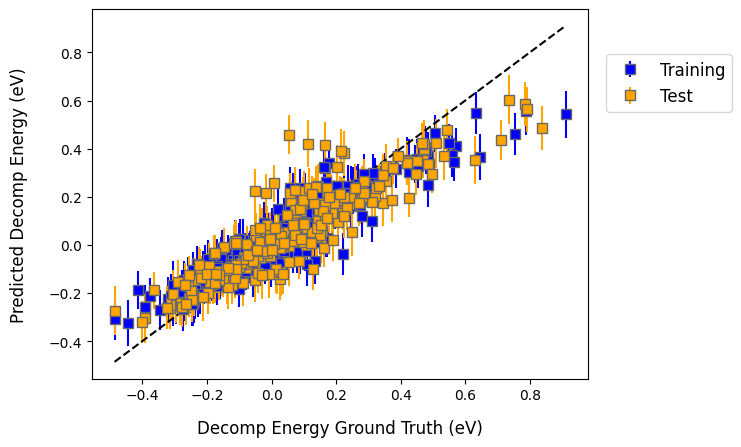

In [35]:
## Gaussian Process Regression ##


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

ker_dp = C(1.0, (1e-3, 1e3)) * DotProduct(2)
ker_rbf = C(1.0, (1e-5, 1e5)) * RBF(10, (1e-5, 1e5))
ker_rq = C(1.0, (1e-5, 1e5)) * RationalQuadratic(alpha=0.1, length_scale=10, length_scale_bounds=(1e-5, 1e5))
ker_expsine = C(1.0, (1e-5, 1e5)) * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))
ker_matern = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-4, 1e4), nu=1.5)

ker_rbf = C(1.0) * RBF(10)

param_grid = {
#"kernel": [ker_matern, ker_rbf, ker_rq, ker_dp, ker_expsine],
"kernel": [ker_expsine],
#"alpha": [1e0, 1e-1, 1e-2, 1e-3],
"alpha": [1e-1],
"optimizer": ['fmin_l_bfgs_b'],
#"n_restarts_optimizer": [50, 100, 200]
"n_restarts_optimizer": [50]
}


X = Comp_desc
#X = Elem_desc
#X = All_desc
X_train, X_test, Decomp_train, Decomp_test, Gap_train, Gap_test, Formulas_train, Formulas_test = train_test_split(X, Decomp, Gap, Formula, test_size=0.5)

gpr = GaussianProcessRegressor()
gpr = GaussianProcessRegressor(kernel=ker_expsine, alpha=0.1, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=50)

gpr.fit(X_train, Decomp_train)
Pred_train, sigma_train = gpr.predict(X_train, return_std=True)
Pred_test, sigma_test = gpr.predict(X_test, return_std=True)
rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_train, Pred_train) )
print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test) + '\n')

#plt.scatter(Decomp_train, Pred_train, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Training')
#plt.scatter(Decomp_test, Pred_test, c='red', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Test')

plt.errorbar(Decomp_train, Pred_train, yerr = [sigma_train[:], sigma_train[:]], c='blue', marker='s', alpha=1.0, markeredgecolor='dimgrey', markersize=7, fmt='o', ecolor='blue', capthick=2, label='Training')
plt.errorbar(Decomp_test, Pred_test, yerr = [sigma_test[:], sigma_test[:]], c='orange', marker='s', alpha=1.0, markeredgecolor='dimgrey', markersize=7, fmt='o', ecolor='orange', capthick=2, label='Test')

plt.xlabel('Decomp Energy Ground Truth (eV)', fontsize=12, labelpad=12)
plt.ylabel('Predicted Decomp Energy (eV)', fontsize=12, labelpad=15)
plt.legend(bbox_to_anchor=(1.02,0.9), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':12})

x_line = np.linspace(min(Decomp_train.min(), Decomp_test.min()), max(Decomp_train.max(), Decomp_test.max()), 100)  # Adjust the range as needed
y_line = x_line  # Since y = x
plt.plot(x_line, y_line, color='black', ls='--', label='y=x')




In [36]:
## Active Learning ##


X = Comp_desc
#X = Elem_desc
#X = All_desc
X_train, X_test, Decomp_train, Decomp_test, Gap_train, Gap_test, Formulas_train, Formulas_test = train_test_split(X, Decomp, Gap, Formula, test_size=0.5)

gpr = GaussianProcessRegressor()
gpr = GaussianProcessRegressor(kernel=ker_expsine, alpha=0.1, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=50)

gpr.fit(X_train, Decomp_train)
Pred_train, sigma_train = gpr.predict(X_train, return_std=True)
Pred_test, sigma_test = gpr.predict(X_test, return_std=True)
rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Decomp_train, Pred_train) )

n_te = len(Decomp_test)
n_tr = len(Decomp_train)
n = len(training_data) # Define n as the total number of data points

from scipy.stats import norm

Prop_train = Decomp_train
Prop_test = Decomp_test


###  Acquisition functions  ###


# Upper Confidence Bound #

ucb_te = [0.0]*n_te
epsilon = 0.01
for i in range(0,n_te):
    if sigma_test[i] > 0.0:
        ucb_te[i] = -1*Pred_test[i]*epsilon*sigma_test[i]
    else:
        ucb_te[i] = 0.0


# Probability of Improvement #

poi_te = [0.0]*n_te
epsilon = 0.01
pred_best = min(Pred_test)
for i in range(0,n_te):
    if sigma_test[i] > 0.0:
        zzval = (-1*Pred_test[i] - pred_best - epsilon)/sigma_test[i]
        poi_te[i] = norm.cdf(zzval)
    else:
        poi_te[i] = 0.0


# Expected Improvement #

expi_te = [0.0]*n_te
epsilon = 0.01
pred_best = min(Pred_test)
for i in range(0,n_te):
    if sigma_test[i] > 0.0:
        zzval = (-1*Pred_test[i] - pred_best)/sigma_test[i]
        expi_te[i] = (-1*Pred_test[i] - pred_best - epsilon)*norm.cdf(zzval) + sigma_test[i]*norm.pdf(zzval)
    else:
        expi_te[i] = 0.0



print('rmse_test = ', rmse_test)
print('rmse_train = ', rmse_train)
print('max_exp_imp_value = ', max(expi_te))
print('max_exp_imp_compound = ', Formulas_test.iloc[np.argmax(expi_te)]) # Use .iloc
print('max_prob_imp_value = ', max(poi_te))
print('max_prob_imp_compound = ', Formulas_test.iloc[np.argmax(poi_te)]) # Use .iloc
print('max_ucb_value = ', max(ucb_te))
print('max_ucb_compound = ', Formulas_test.iloc[np.argmax(ucb_te)]) # Use .iloc
print('      ')




times = 5
add = 10
nt = n_tr
X_train_temp = copy.deepcopy(X_train)
X_test_temp = copy.deepcopy(X_test)
Prop_train_temp = copy.deepcopy(Prop_train)
Prop_test_temp = copy.deepcopy(Prop_test)
Formulas_train_temp = copy.deepcopy(Formulas_train)
Formulas_test_temp = copy.deepcopy(Formulas_test)

rmse_train_all = [0.0]*(times+1)
rmse_test_all = [0.0]*(times+1)
rmse_train_all[0] = rmse_train
rmse_test_all[0] = rmse_test

iter = [0.0]*(times+1)
iter[0] = n_tr

max_expi = [0.0]*(times+1)
max_expi[0] = max(expi_te)

max_poi = [0.0]*(times+1)
max_poi[0] = max(poi_te)

max_ucb = [0.0]*(times+1)
max_ucb[0] = max(ucb_te)


for i in range(0,times):
    nt = nt + add
    expi_sorted = np.argsort(expi_te)[::-1]
    poi_sorted = np.argsort(poi_te)[::-1]
    ucb_sorted = np.argsort(ucb_te)[::-1]

    if nt == n:
        X_train_new = X.copy()
        X_test_new = pd.DataFrame() # Empty DataFrame as all data is in train
        Prop_train_new = Decomp.copy()
        Prop_test_new = pd.Series(dtype='float64') # Empty Series
        Formulas_train_new = Formula.copy()
        Formulas_test_new = pd.Series(dtype='object') # Empty Series
    else:
        # Select samples to move from test to train based on UCB
        ucb_indices_to_move = X_test_temp.iloc[ucb_sorted[:add]].index

        # Append selected test samples to training set
        X_train_new = pd.concat([X_train_temp, X_test_temp.loc[ucb_indices_to_move]]).reset_index(drop=True)
        Prop_train_new = pd.concat([Prop_train_temp, Prop_test_temp.loc[ucb_indices_to_move]]).reset_index(drop=True)
        Formulas_train_new = pd.concat([Formulas_train_temp, Formulas_test_temp.loc[ucb_indices_to_move]]).reset_index(drop=True)

        # Remove selected samples from test set
        X_test_new = X_test_temp.drop(ucb_indices_to_move).reset_index(drop=True)
        Prop_test_new = Prop_test_temp.drop(ucb_indices_to_move).reset_index(drop=True)
        Formulas_test_new = Formulas_test_temp.drop(ucb_indices_to_move).reset_index(drop=True)


    gpr.fit(X_train_new, Prop_train_new)
    Pred_train, sigma_train = gpr.predict(X_train_new, return_std=True)

    if nt < n:
        Pred_test, sigma_test = gpr.predict(X_test_new, return_std=True)
        rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Prop_test_new, Pred_test) ) # Use Prop_test_new
        rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Prop_train_new, Pred_train) ) # Use Prop_train_new

        n_te = n - nt

        ucb_te = [0.0]*n_te
        epsilon = 0.01
        for ii in range(0,n_te):
            if sigma_test[ii] > 0.0:
                ucb_te[ii] = -1*Pred_test[ii]*epsilon*sigma_test[ii]
            else:
                ucb_te[ii] = 0.0

        poi_te = [0.0]*n_te
        epsilon = 0.01
        pred_best = min(Pred_test)
        for ii in range(0,n_te):
            if sigma_test[ii] > 0.0:
                zzval = (-1*Pred_test[ii] - pred_best - epsilon)/sigma_test[ii]
                poi_te[ii] = norm.cdf(zzval)
            else:
                poi_te[ii] = 0.0

        n_te = n - nt
        expi_te = [0.0]*n_te
        epsilon = 0.01
        pred_best = min(Pred_test)
        for ii in range(0,n_te):
            if sigma_test[ii] > 0.0:
                zzval = (-1*Pred_test[ii] - pred_best)/sigma_test[ii]
                expi_te[ii] = (-1*Pred_test[ii] - pred_best - epsilon)*norm.cdf(zzval) + sigma_test[ii]*norm.pdf(zzval)
            else:
                expi_te[ii] = 0.0

        rmse_train_all[i+1] = rmse_train
        rmse_test_all[i+1] = rmse_test

        X_train_temp = X_train_new.copy()
        X_test_temp = X_test_new.copy()
        Prop_train_temp = Prop_train_new.copy()
        Prop_test_temp = Prop_test_new.copy()
        Formulas_train_temp = Formulas_train_new.copy()
        Formulas_test_temp = Formulas_test_new.copy()

        iter[i+1] = nt
        max_expi[i+1] = max(expi_te)
        max_poi[i+1] = max(poi_te)
        max_ucb[i+1] = max(ucb_te)

        print('rmse_test = ', rmse_test) # Use rmse_test
        print('rmse_train = ', rmse_train) # Use rmse_train
        print('max_exp_imp_value = ', max(expi_te))
        print('max_exp_imp_compound = ', Formulas_test_new.iloc[np.argmax(expi_te)]) # Use Formulas_test_new
        print('max_prob_imp_value = ', max(poi_te))
        print('max_prob_imp_compound = ', Formulas_test_new.iloc[np.argmax(poi_te)]) # Use Formulas_test_new
        print('max_ucb_value = ', max(ucb_te))
        print('max_ucb_compound = ', Formulas_test_new.iloc[np.argmax(ucb_te)]) # Use Formulas_test_new
        print('      ')
    else:
        # Handle the case when nt == n
        rmse_train_all[i+1] = np.sqrt( sklearn.metrics.mean_squared_error(Prop_train_new, Pred_train) )
        rmse_test_all[i+1] = 0.0 # Test set is empty
        iter[i+1] = nt
        max_expi[i+1] = 0.0 # No test set for acquisition functions
        max_poi[i+1] = 0.0
        max_ucb[i+1] = 0.0
        print('All data moved to training set.')
        print('Train RMSE: ', rmse_train_all[i+1])
        print('Test RMSE: ', rmse_test_all[i+1])
        print('      ')


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


rmse_test =  0.10720432794862055
rmse_train =  0.09237404564076587
max_exp_imp_value =  0.5770836385784281
max_exp_imp_compound =  CsGeCl3
max_prob_imp_value =  0.9999999999755718
max_prob_imp_compound =  MA1Ge0.12Pb0.88Cl1.5Br1.5
max_ucb_value =  0.000278720002734813
max_ucb_compound =  CsGeCl3
      


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


rmse_test =  0.10580002223778963
rmse_train =  0.0905456545037114
max_exp_imp_value =  0.4960220811475084
max_exp_imp_compound =  CsGe0.5Sn0.5Br3
max_prob_imp_value =  0.9999999998773342
max_prob_imp_compound =  CsGe0.5Sn0.5Br3
max_ucb_value =  0.00021052928252957584
max_ucb_compound =  FAGeBr3
      


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


rmse_test =  0.10782391920745638
rmse_train =  0.0889210109485369
max_exp_imp_value =  0.40183890373848924
max_exp_imp_compound =  K0.25Rb0.25Cs0.12MA0.38Ge1Cl3
max_prob_imp_value =  0.9999999868867564
max_prob_imp_compound =  Cs1Ca0.12Ba0.12Ge0.25Sn0.5Br3
max_ucb_value =  0.0001519849019287348
max_ucb_compound =  Cs1Ge0.12Pb0.88Cl3
      


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


rmse_test =  0.10719366616814367
rmse_train =  0.08810209168049314
max_exp_imp_value =  0.3113984953893392
max_exp_imp_compound =  Rb1Ge0.88Pb0.12Cl3
max_prob_imp_value =  0.9999986398709197
max_prob_imp_compound =  MA1Ge0.12Pb0.88Cl1.5Br1.5
max_ucb_value =  0.0001436457291032467
max_ucb_compound =  Rb1Ge0.88Pb0.12Cl3
      


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


rmse_test =  0.10870880586611405
rmse_train =  0.08714572936763247
max_exp_imp_value =  0.3012151413152657
max_exp_imp_compound =  MA1Ge0.12Pb0.88Cl1.5Br1.5
max_prob_imp_value =  0.999998681969792
max_prob_imp_compound =  MA1Ge0.12Pb0.88Cl1.5Br1.5
max_ucb_value =  0.00010685144713554114
max_ucb_compound =  Rb1Ge1Br3
      
rmse_test =  0.15241831714672244
rmse_train =  0.13912332541799977
max_exp_imp_value =  0.17499812269106882
max_exp_imp_compound =  MA1Sn0.12Pb0.88Cl1.5Br1.5
max_prob_imp_value =  0.9999696764293802
max_prob_imp_compound =  MA1Sn0.12Pb0.88Cl1.5Br1.5
max_ucb_value =  4.239143082829188e-05
max_ucb_compound =  MA1Ca0.5Pb0.5Cl3
      


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [37]:
nt

306

In [63]:
## Train Neural Network models ##


import tensorflow as tf
from tensorflow import keras

#X = Comp_desc
#m = 14
#X = Elem_desc
#m = 36
X = All_desc
m = 50

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, Decomp_train, Decomp_test, Gap_train, Gap_test, Formulas_train, Formulas_test = train_test_split(X, Decomp, Gap, Formula, test_size=0.2)

#Y_train = Decomp_train.to_numpy()
#Y_test = Decomp_test.to_numpy()
Y_train = Gap_train.to_numpy()
Y_test = Gap_test.to_numpy()

idx = int(0.8*len(Y_train))
Xtrain = X_train[:idx] #80% training
Ytrain = Y_train[:idx]
Xval = X_train[idx:] #20% validation
Yval = Y_train[idx:]

model = keras.Sequential() #initialize a Sequential model
model.add(keras.Input(shape=(m,))) #Add an input layer, the shape parameter tells how many inputs each data point will have
model.add(keras.layers.Dense(100, activation='tanh')) #Dense defines a fully connected layer, the argument specifies the number of neurons
model.add(keras.layers.Dense(100, activation='tanh')) #activation defines the activation function applied after each layer
model.add(keras.layers.Dense(1, activation='relu')) #Output layer can use a 'relu' activation since outputs are always positive

model.summary()
#Summary helps view the layers in the model
#and the number of parameters in each layer


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,301 (59.77 KB)

 Trainable params: 15,301 (59.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1550 - val_loss: 0.1031
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1220 - val_loss: 0.0960
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1089 - val_loss: 0.0907
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1071 - val_loss: 0.0899
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1024 - val_loss: 0.0888
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1013 - val_loss: 0.0892
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0998 - val_loss: 0.0892
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0987 - val_loss: 0.0891
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0971 - val_loss: 0.0883
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0958 - val_loss: 0.0873
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0941 - val_loss: 0.0860
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0

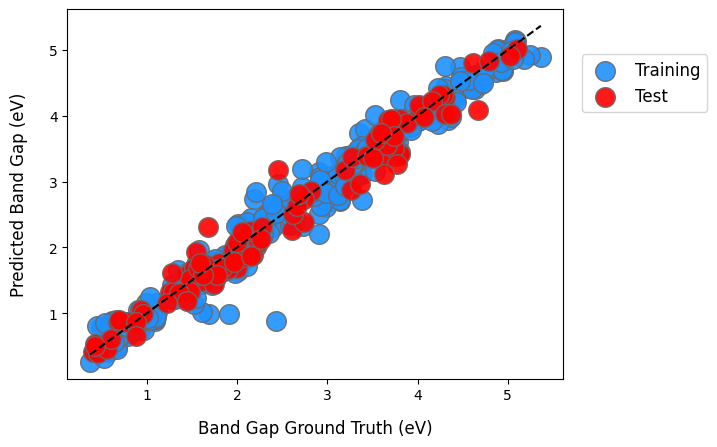

In [65]:

optimizer = keras.optimizers.Adam(learning_rate=1e-3) # Initialize an Adam optimizer with a learning rate of 0.001
model.compile(optimizer=optimizer, loss=keras.losses.MeanSquaredError()) #Compile the model with the Adam optimizer and MSE loss
EPOCHS = 100 #Epoch

model.fit(Xtrain, Ytrain, epochs=EPOCHS, validation_data=(Xval, Yval))

Pred_train = model.predict(X_train)
Pred_test = model.predict(X_test)
rmse_test = np.sqrt( sklearn.metrics.mean_squared_error(Y_test, Pred_test) )
rmse_train = np.sqrt( sklearn.metrics.mean_squared_error(Y_train, Pred_train) )
print("Train RMSE: " + str(rmse_train))
print("Test RMSE: " + str(rmse_test) + '\n')

plt.scatter(Y_train, Pred_train, c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Training')
plt.scatter(Y_test, Pred_test, c='red', marker='o', s=200, edgecolors='dimgrey', alpha=0.9, label='Test')

#plt.xlabel('Decomp Energy Ground Truth (eV)', fontsize=12, labelpad=12)
#plt.ylabel('Predicted Decomp Energy (eV)', fontsize=12, labelpad=15)
plt.xlabel('Band Gap Ground Truth (eV)', fontsize=12, labelpad=12)
plt.ylabel('Predicted Band Gap (eV)', fontsize=12, labelpad=15)

plt.legend(bbox_to_anchor=(1.02,0.9), ncol=1, frameon=True, prop={'family':'Arial Narrow','size':12})

x_line = np.linspace(min(Y_train.min(), Y_test.min()), max(Y_train.max(), Y_test.max()), 100)  # Adjust the range as needed
y_line = x_line  # Since y = x
plt.plot(x_line, y_line, color='black', ls='--', label='y=x')


